In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel

### AGGREGATE SUPPLY AND DEMAND WITH FLEXIBLE PRICES AND EXCHANGE RATES FOR AN OPEN ECONOMY::

#### 1. Derivation of the Aggregate Demand $(DA)$:

In [3]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
h = 0.8
b = 0.9
m = 0.5
t = 0.1

x1 = 0.3
Yº = 12
x2 = 0.6
m2 = 0.4
Eo = 9
p = 0.8
rº = 8
r = 12
m1 = 0.1

Y = np.arange(Y_size)


# Ecuación

def DA(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1):
    DA = [Co + Io + Go + x1 *Yº +(x2 + m2)* Eo + (x2 + m2)* p*rº -(h +(x2 +m2)*p)*r]+[(b-m1)*(1-t)]*Y
    return DA

DA = DA(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1)


In [4]:
# Recta de 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

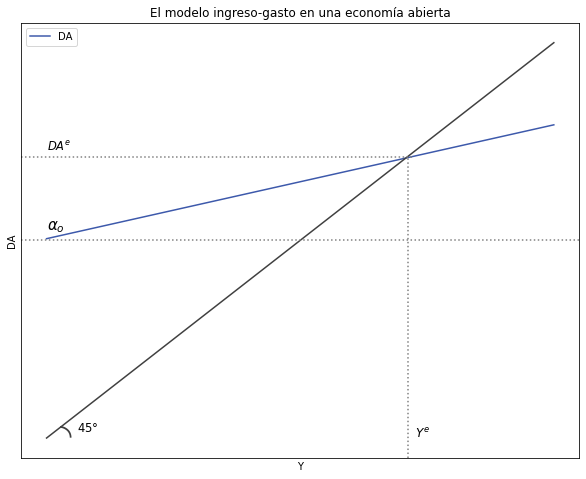

In [6]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, DA, label = "DA", color = "#3D59AB") #Demanda agregada
ax.plot(Y, L_45, color = "#404040") #Línea de 45º

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Líneas punteadas
plt.axvline(x=70.5,  ymin= 0, ymax= 0.69, linestyle = ":", color = "grey")
plt.axhline(y=124, xmin= 0, xmax= 1, linestyle = ":", color = "grey")
plt.axhline(y=176, xmin= 0, xmax= 0.7, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 130, '$α_o$', fontsize = 15, color = 'black')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')

# Título y leyenda
ax.set(title="El modelo ingreso-gasto en una economía abierta", xlabel= r'Y', ylabel= r'DA')
ax.legend()

plt.show()



#### 2. The IS-LM model with a flexible exchange rate and free capital mobility:

In [7]:
# IS

Y_size = 100 

Co = 25
Io = 5
Go = 18
h = 0.8
b = 0.4
m = 0.5
t = 0.1

x1 = 0.3
Yº = 12
x2 = 0.6
m2 = 0.4
Eo = 8
p = 0.8
rº = 8
m1 = 0.1

Y = np.arange(Y_size)


# Ecuación

def r_IS(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1):
    r_IS = ((Co + Io + Go + (x2+m2)*Eo + (x2+m2)*p*rº+x1*Yº)/(h+(x2+m2)*p)) - (((1-(b-m1)*(1-t))*Y)/(h+(x2+m2)*p))
    return r_IS

r_IS = r_IS(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1)


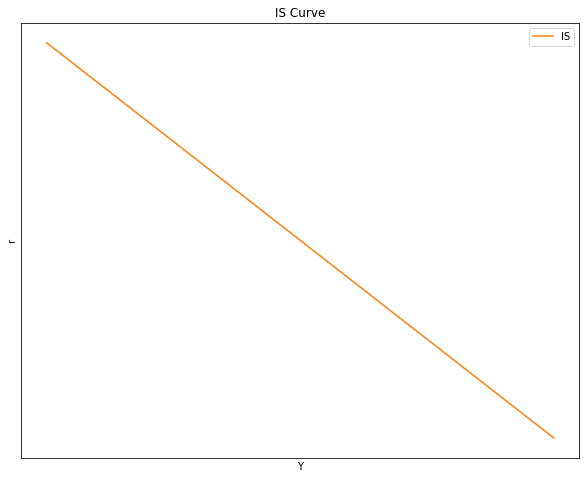

In [11]:
# Gráfico de la curva IS

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_IS, label = "IS", color = "C1") #Demanda agregada

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title = "IS Curve", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()

In [9]:
# LM

Y_size = 100 

k = 0.4
j = 0.7               
Ms = 70             
Po  = 20 

Y = np.arange(Y_size)

# Ecuación

def r_LM( k, j, Ms, Po, Y):
    r_LM = (-Ms/Po)/j + k/j*Y
    return r_LM

r_LM = r_LM( k, j, Ms, Po, Y)

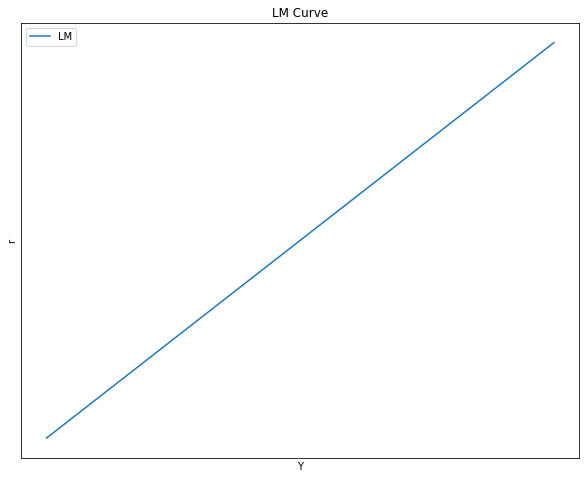

In [12]:
    # Gráfico de la curva LM

# Dimensiones del gráfico
y_max = np.max(Y)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Curvas a graficar
ax.plot(Y, r_LM, label="LM", color = 'C0')

# Título y leyenda
ax.set(title="LM Curve", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

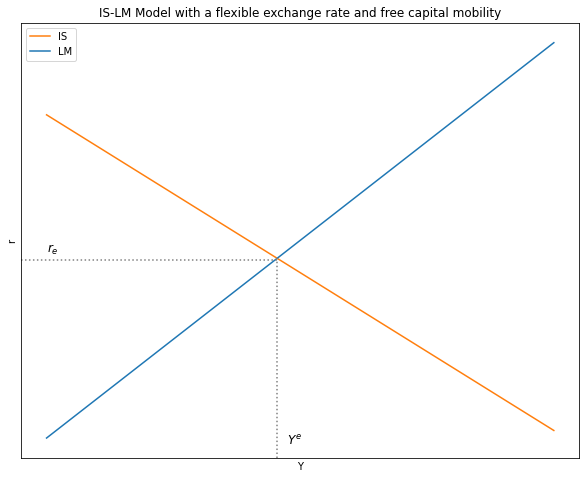

In [52]:
    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_IS, label = "IS", color = "C1") #IS
ax.plot(Y, r_LM, label="LM", color = "C0")  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y líneas agregadas
plt.axhline(y=20.5, xmin= 0, xmax= 0.46, linestyle = ":", color = "grey")
plt.axvline(x=45,  ymin= 0, ymax= 0.46, linestyle = ":", color = "grey")

plt.text(0, 21.5, '$r_e$', fontsize = 12, color = 'black')
plt.text(47, -6, '$Y^e$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
ax.set(title="IS-LM Model with a flexible exchange rate and free capital mobility", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()


#### 3.1 Comparative Statics:

#### - Increase in Government Spending $G_0$:

In [53]:
# IS

Y_size = 100 

Co = 25
Io = 5
Go = 18
h = 0.8
b = 0.4
m = 0.5
t = 0.1

x1 = 0.3
Yº = 12
x2 = 0.6
m2 = 0.4
Eo = 8
p = 0.8
rº = 8
m1 = 0.1

Y = np.arange(Y_size)


# Ecuación

def r_IS(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1):
    r_IS = ((Co + Io + Go + (x2+m2)*Eo + (x2+m2)*p*rº+x1*Yº)/(h+(x2+m2)*p)) - (((1-(b-m1)*(1-t))*Y)/(h+(x2+m2)*p))
    return r_IS

r_IS = r_IS(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1)

#------------
Go = 35

# Ecuación

def r_IS_G(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1):
    r_IS = ((Co + Io + Go + (x2+m2)*Eo + (x2+m2)*p*rº+x1*Yº)/(h+(x2+m2)*p)) - (((1-(b-m1)*(1-t))*Y)/(h+(x2+m2)*p))
    return r_IS

r_IS_G = r_IS_G(Co, Io, Go, h, b, m, t, x1, Yº, x2, m2, Eo, p, rº, r, m1)


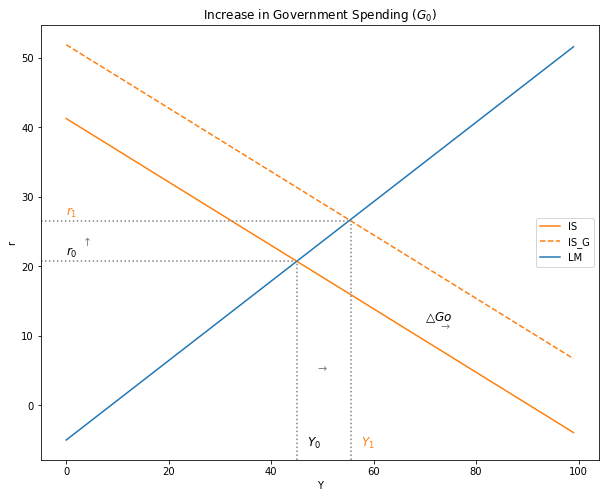

In [89]:
    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_IS, label = "IS", color = "C1") #IS
ax.plot(Y, r_IS_G, label = "IS_G", color = "C1", linestyle ='dashed') #IS

ax.plot(Y, r_LM, label="LM", color = "C0")  #LM

# Texto y líneas agregadas
plt.axhline(y=20.7, xmin= 0, xmax= 0.46, linestyle = ":", color = "grey")
plt.axvline(x=45,  ymin= 0, ymax= 0.46, linestyle = ":", color = "grey")
plt.axhline(y=26.5, xmin= 0, xmax= 0.55, linestyle = ":", color = "grey")
plt.axvline(x=55.6,  ymin= 0, ymax= 0.55, linestyle = ":", color = "grey")

plt.text(0, 21.5, '$r_0$', fontsize = 12, color = 'black')
plt.text(47, -6, '$Y_0$', fontsize = 12, color = 'black')

plt.text(0, 27.3, '$r_1$', fontsize = 12, color = 'C1')
plt.text(57.6, -6, '$Y_1$', fontsize = 12, color = 'C1')

plt.text(73, 11, '$→$', fontsize = 11, color = 'grey')
plt.text(49, 5, '$→$', fontsize = 11, color = 'grey')
plt.text(3, 23, '$↑$', fontsize = 11, color = 'grey')
plt.text(70, 12.2, '$△Go$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
ax.set(title="Increase in Government Spending $(G_0)$", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

#### - Incrase in Monetary Mass $M_o^s$:

In [90]:
# LM

Y_size = 100 

k = 0.4
j = 0.7               
Ms = 70             
Po  = 20 

Y = np.arange(Y_size)

# Ecuación

def r_LM( k, j, Ms, Po, Y):
    r_LM = (-Ms/Po)/j + k/j*Y
    return r_LM

r_LM = r_LM( k, j, Ms, Po, Y)


#------------------------------------------------

# Nueva Curva LM
Ms = 200

# Ecuación

def r_LM_Ms( k, j, Ms, Po, Y):
    r_LM = (-Ms/Po)/j + k/j*Y
    return r_LM

r_LM_Ms = r_LM_Ms( k, j, Ms, Po, Y)

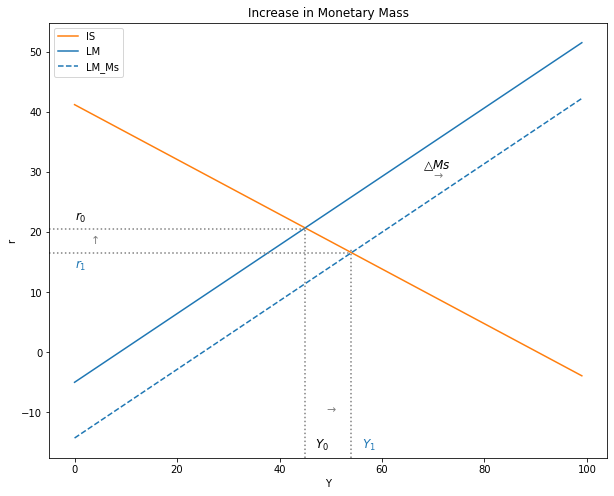

In [129]:
    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(Y)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_IS, label = "IS", color = "C1") #IS
ax.plot(Y, r_LM, label="LM", color = "C0")  #LM
ax.plot(Y, r_LM_Ms, label="LM_Ms", color = "C0", linestyle = 'dashed')  #LM

# Texto y líneas agregadas
plt.axhline(y=20.5, xmin= 0, xmax= 0.46, linestyle = ":", color = "grey")
plt.axvline(x=45,  ymin= 0, ymax= 0.53, linestyle = ":", color = "grey")
plt.axhline(y=16.5, xmin= 0, xmax= 0.54, linestyle = ":", color = "grey")
plt.axvline(x=54,  ymin= 0, ymax= 0.48, linestyle = ":", color = "grey")

plt.text(0, 22, '$r_0$', fontsize = 12, color = 'black')
plt.text(47, -16, '$Y_0$', fontsize = 12, color = 'black')
plt.text(0, 14, '$r_1$', fontsize = 12, color = 'C0')
plt.text(56, -16, '$Y_1$', fontsize = 12, color = 'C0')

plt.text(70, 29, '$→$', fontsize = 11, color = 'grey')
plt.text(49, -10, '$→$', fontsize = 11, color = 'grey')
plt.text(3, 18, '$↑$', fontsize = 11, color = 'grey')
plt.text(68, 30.5, '$△Ms$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
ax.set(title="Increase in Monetary Mass", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()